## ML Project

### Predicting players rating

In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

Download the data in the same folder and run the following commmand to get it in the environment.

#### About the Dataset

#### The ultimate Soccer database for data analysis and machine learning

The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.

- +25,000 matches

- +10,000 players

- 11 European Countries with their lead championship

- Seasons 2008 to 2016

- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates

- Team line up with squad formation (X, Y coordinates)

- Betting odds from up to 10 providers

- Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.

#### Python skills required to complete this project

#### SQL:

The data is in SQL database so students need to retrive using query language. They also need to know how to connect SQL database woth python. The library we are using for this in 'sqlite3'. SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You do not need to install this module separately because it is shipped by default along with Python version 2.5.x onwards. To use sqlite3 module, you must first create a connection object that represents the database and then optionally you can create a cursor object, which will help you in executing all the SQL statements.

#### Pandas:

Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python with Pandas is used in a wide range of fields including academic and commercial domains including finance, economics, Statistics, analytics, etc. In this tutorial, we will learn the various features of Python Pandas and how to use them in practice.

#### Scikit Learn:

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes:

- NumPy: Base n-dimensional array package

- SciPy: Fundamental library for scientific computing

- Matplotlib: Comprehensive 2D/3D plotting

- IPython: Enhanced interactive console

- Sympy: Symbolic mathematics

- Pandas: Data structures and analysis

Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.

The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as easy of use, code quality, collaboration, documentation and performance.

#### Machine Learning skills required to complete the project

##### Supervised learning

Supervised learning deals with learning a function from available training data. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples.

##### Regression

Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables. It is parametric in nature because it makes certain assumptions (discussed next) based on the data set. If the data set follows those assumptions, regression gives incredible results.

##### Model evaluation

Student must know how to judge a model on unseen data. What metric to select to judge the performance

### Let's get started.....

##### Import Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Read Data from the Database into pandas

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
dt = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
dt.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
dt.shape

(183978, 42)

In [5]:
df = dt.copy()
df.drop(['id', 'date', 'player_fifa_api_id', 'player_api_id'], inplace=True, axis = 1)
df.columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
df['overall_rating'].describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

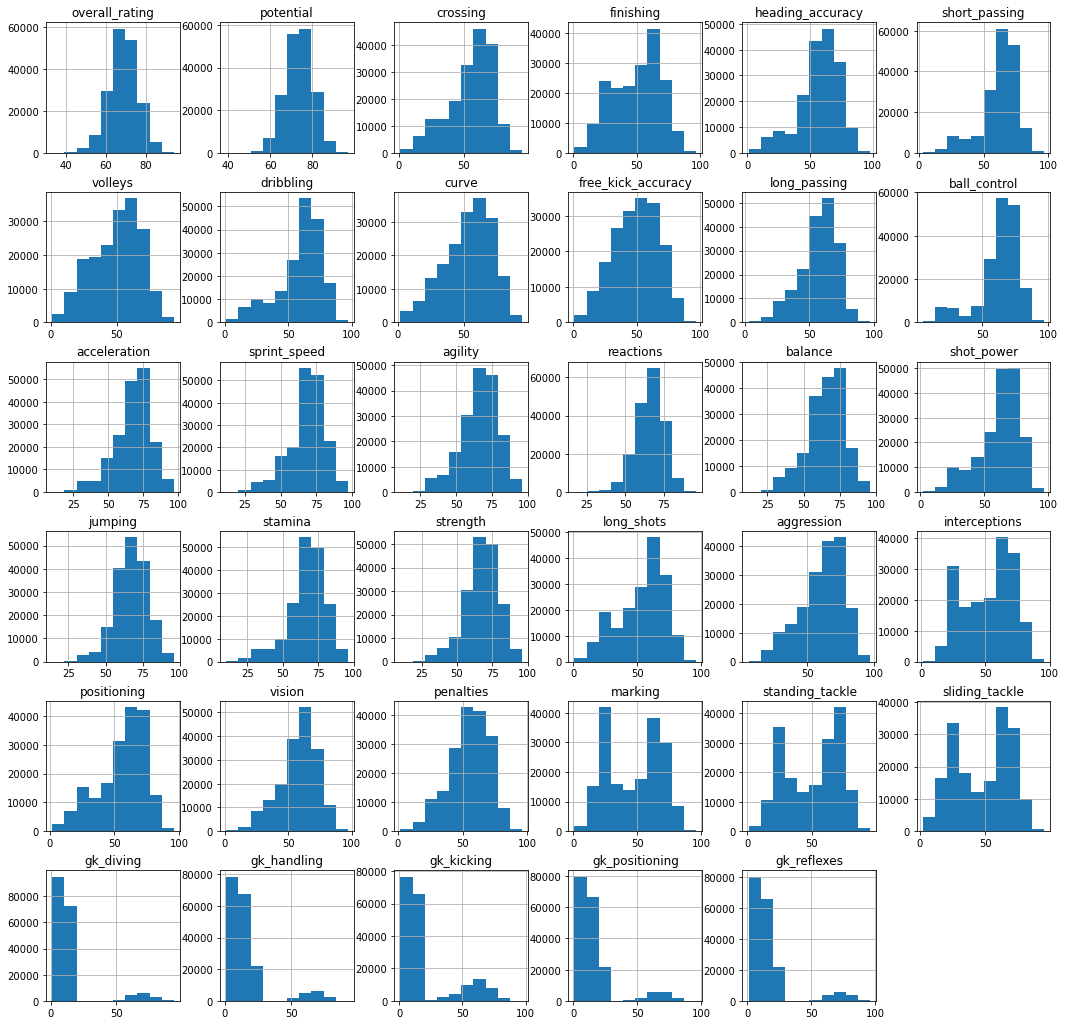

In [7]:
df.hist(figsize=(18, 18))
plt.show()

### Missing Values

In [8]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1 and df[feature].dtypes == 'O']

for feature in features_nan:
    print("{} : {} % missing values".format(feature, np.round(df[feature].isnull().mean()*100, 4)))

preferred_foot : 0.4544 % missing values
attacking_work_rate : 1.7556 % missing values
defensive_work_rate : 0.4544 % missing values


In [9]:
## Replace missing value with a new label
def replace_cat_feature(dataset, features_nan):
    data = dataset.copy()
    data[features_nan] = data[features_nan].fillna('Missing')
    return data

df = replace_cat_feature(df, features_nan)

df[features_nan].isnull().sum()

preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
dtype: int64

In [10]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1 and df[feature].dtypes != 'O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {} % missing values".format(feature, np.round(df[feature].isnull().mean()*100, 4)))

overall_rating: 0.4544 % missing values
potential: 0.4544 % missing values
crossing: 0.4544 % missing values
finishing: 0.4544 % missing values
heading_accuracy: 0.4544 % missing values
short_passing: 0.4544 % missing values
volleys: 1.4746 % missing values
dribbling: 0.4544 % missing values
curve: 1.4746 % missing values
free_kick_accuracy: 0.4544 % missing values
long_passing: 0.4544 % missing values
ball_control: 0.4544 % missing values
acceleration: 0.4544 % missing values
sprint_speed: 0.4544 % missing values
agility: 1.4746 % missing values
reactions: 0.4544 % missing values
balance: 1.4746 % missing values
shot_power: 0.4544 % missing values
jumping: 1.4746 % missing values
stamina: 0.4544 % missing values
strength: 0.4544 % missing values
long_shots: 0.4544 % missing values
aggression: 0.4544 % missing values
interceptions: 0.4544 % missing values
positioning: 0.4544 % missing values
vision: 1.4746 % missing values
penalties: 0.4544 % missing values
marking: 0.4544 % missing va

In [11]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)
    
df[numerical_with_nan].isnull().sum()

overall_rating        0
potential             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys               0
dribbling             0
curve                 0
free_kick_accuracy    0
long_passing          0
ball_control          0
acceleration          0
sprint_speed          0
agility               0
reactions             0
balance               0
shot_power            0
jumping               0
stamina               0
strength              0
long_shots            0
aggression            0
interceptions         0
positioning           0
vision                0
penalties             0
marking               0
standing_tackle       0
sliding_tackle        0
gk_diving             0
gk_handling           0
gk_kicking            0
gk_positioning        0
gk_reflexes           0
dtype: int64

In [12]:
# Examine the categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
for feature in categorical_features:
    print('_'*10, feature, end=" ",)
    print('_'*10)
    print(df[feature].value_counts())

__________ preferred_foot __________
right      138409
left        44733
Missing       836
Name: preferred_foot, dtype: int64
__________ attacking_work_rate __________
medium     125070
high        42823
low          8569
None         3639
Missing      3230
norm          348
y             106
le            104
stoc           89
Name: attacking_work_rate, dtype: int64
__________ defensive_work_rate __________
medium     130846
high        27041
low         18432
_0           2394
o            1550
Missing       836
1             441
ormal         348
2             342
3             258
5             234
7             217
6             197
0             197
9             152
4             116
es            106
ean           104
tocky          89
8              78
Name: defensive_work_rate, dtype: int64


### Handling Rare Categorical Feature

We will group categorical variable's values that are present less than 2% of the total number of observations.

In [13]:
len(df)

183978

In [14]:
for feature in categorical_features:
    temp = df.groupby(feature)[feature].count()/len(df)
    temp_df = temp[temp > 0.02].index
    df[feature] = np.where(df[feature].isin(temp_df), df[feature], 'Rare-Value')

# Examine the categorical features
for feature in categorical_features:
    print('_'*10, feature, end=" ",)
    print('_'*10)
    print(df[feature].value_counts())

__________ preferred_foot __________
right         138409
left           44733
Rare-Value       836
Name: preferred_foot, dtype: int64
__________ attacking_work_rate __________
medium        125070
high           42823
low             8569
Rare-Value      7516
Name: attacking_work_rate, dtype: int64
__________ defensive_work_rate __________
medium        130846
high           27041
low            18432
Rare-Value      7659
Name: defensive_work_rate, dtype: int64


### Applying One-Hot encoding to all the categorical features

In [15]:
# One-Hot encoding
df1 = pd.get_dummies(df[categorical_features], drop_first=True)
df1.head()

,preferred_foot_left,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium
0,0,1,0,0,1,0,0,1
1,0,1,0,0,1,0,0,1
2,0,1,0,0,1,0,0,1
3,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,1


In [16]:
# Numerical features
df2 = df.drop(categorical_features, axis=1)
df2.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [17]:
# Dependent Variable
y = df2['overall_rating']
y.shape

(183978,)

In [18]:
# Independent Variable
df2.drop('overall_rating', inplace=True, axis=1)
X = pd.concat([df1, df2], axis=1)
X.head()

,preferred_foot_left,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,potential,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,0,0,1,0,0,1,71.0,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,0,1,0,0,1,0,0,1,71.0,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,0,1,0,0,1,0,0,1,66.0,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,0,1,0,0,1,0,0,1,65.0,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,0,1,0,0,1,0,0,1,65.0,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Training and Predicting

In [19]:
# Linear Regression
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
### fit_transform
X_scaled = scaler.fit_transform(X)

# Trian Test Split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.25, random_state=101)

# Create a linear regression object
lin_reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
lin_reg.fit(X_train_s, y_train_s)

print('R-squared = ', lin_reg.score(X_train_s, y_train_s))

# Let's create a function to create adjusted R-Squared
def adj_r2(model, x, y):
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print('Adjusted R-squared = ', adj_r2(lin_reg, X_train_s, y_train_s))

# Once we have trained and fine-tuned our model, we can proceed to testing it
# Our test inputs are 'x_test_s', while the outputs: 'y_test_s' 

print('Test Data R-squared = ', lin_reg.score(X_test_s, y_test_s))
print('Test Data Adjusted R-squared = ', adj_r2(lin_reg, X_test_s, y_test_s))

y_pred = lin_reg.predict(X_test_s)
mse = mean_squared_error(y_test_s, y_pred)
print("MSE: %.4f" % mse)
print("RMSE: %.4f" % (mse**(1/2.0)))

R-squared =  0.8434062995399565
Adjusted R-squared =  0.8433586198573457
Test Data R-squared =  0.8452598338937988
Test Data Adjusted R-squared =  0.8451184018130088
MSE: 7.6451
RMSE: 2.7650


In [20]:
# Decision Tree Regression
# Trian Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# create a regressor object
dt_reg = DecisionTreeRegressor(random_state = 0)

# fit the regressor with TRAIN X and Y data
dt_reg.fit(X_train, y_train)
print('R-squared = ', dt_reg.score(X_train, y_train))

# Once we have trained and fine-tuned our model, we can proceed to testing it
# Our test inputs are 'x_test', while the outputs: 'y_test' 

print('Test Data R-squared = ', dt_reg.score(X_test, y_test))

y_pred = dt_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)
print("RMSE: %.4f" % (mse**(1/2.0)))

R-squared =  0.9993823728627871
Test Data R-squared =  0.9633733763459262
MSE: 1.8096
RMSE: 1.3452


In [21]:
# XGBoost Regression

# create a regressor object
xg_reg = XGBRegressor()

# fit the regressor with TRAIN inputs and targets
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
xg_reg.fit(X_train, y_train)
print('R-squared = ', xg_reg.score(X_train, y_train))

# Once we have trained and fine-tuned our model, we can proceed to testing it
# Our test inputs are 'X_test', while the outputs: 'y_test'

print('Test Data R-squared = ', xg_reg.score(X_test, y_test))

y_pred = xg_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)
print("RMSE: %.4f" % (mse**(1/2.0)))

R-squared =  0.9757579433134183
Test Data R-squared =  0.9706715506091744
MSE: 1.4490
RMSE: 1.2037


In [22]:
# Random Forest Regression

# create a regressor object
rf_reg = RandomForestRegressor(random_state = 0)

# fit the regressor with TRAIN inputs and targets
rf_reg.fit(X_train, y_train)
print('R-squared = ', rf_reg.score(X_train, y_train))

# Once we have trained and fine-tuned our model, we can proceed to testing it
# Our test inputs are 'X_test', while the outputs: 'y_test'

print('Test Data R-squared = ', rf_reg.score(X_test, y_test))

y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)
print("RMSE: %.4f" % (mse**(1/2.0)))

R-squared =  0.9970258269558309
Test Data R-squared =  0.9829005912316277
MSE: 0.8448
RMSE: 0.9191


Out of all the above models the Random Forest Regressor model has the highest R-square score. So we go with Random Forest Regressor model

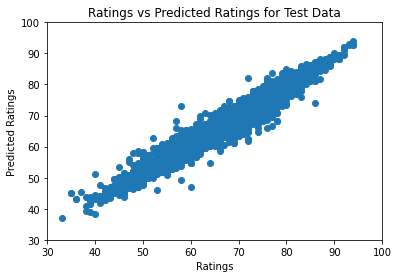

In [23]:
# Create a scatter plot with the test targets (y_test) and the test predictions (y_pred)
# The closer the points to the 45-degree line, the better the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Ratings vs Predicted Ratings for Test Data")
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

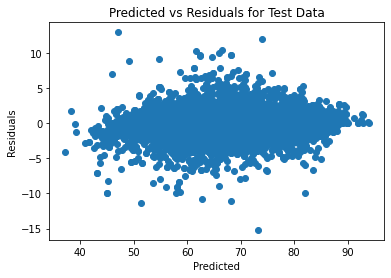

In [24]:
# Checking residuals
plt.scatter(y_pred, y_test - y_pred)
plt.title("Predicted vs Residuals for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Looks good. Residuals do not show any specific pattern.